# Importing necessary modules

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('C:\\Users\\sowme\\OneDrive\\ds2\\spam.csv',encoding='latin-1')

In [25]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
column_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=column_drop, inplace=True)

In [7]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
df[df.duplicated()].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         v1                                                 v2
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]>

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [11]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head(10)

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0.0
6,ham,Even my brother is not like to speak with me. ...,1.0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,1.0
8,spam,WINNER!! As a valued network customer you have...,0.0
9,spam,Had your mobile 11 months or more? U R entitle...,0.0


# Data Training 

In [12]:
X = df['v2']
Y = df['Category']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [14]:
# Create a TF-IDF vectorizer to convert text messages to numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [15]:
print(X_train_features)

  (0, 3903)	0.5840594322397737
  (0, 4003)	0.4665733125931123
  (0, 6010)	0.6642167745455115
  (1, 3672)	0.5737163408939943
  (1, 2154)	0.8190540642663378
  (2, 3075)	0.33120665478779976
  (2, 3300)	0.49958507974919814
  (2, 4618)	0.49958507974919814
  (2, 5805)	0.45920583434234813
  (2, 3583)	0.24009735816969147
  (2, 1763)	0.3501641162571242
  (3, 3891)	0.4204111980396913
  (3, 5240)	0.3598285896676375
  (3, 4575)	0.3968396805141732
  (3, 5042)	0.4352991391821672
  (3, 4512)	0.39499483252028933
  (3, 4525)	0.4367949407898085
  (4, 6294)	0.6377939232039059
  (4, 4519)	0.6377939232039059
  (4, 6409)	0.43178446364863604
  (5, 3991)	0.6135272724876246
  (5, 3553)	0.544325718242287
  (5, 2937)	0.5720959695487414
  (6, 1165)	0.3172200192789814
  (6, 5522)	0.36426180641364037
  :	:
  (3894, 2989)	0.5016704832029851
  (3895, 6289)	0.8551055944400807
  (3895, 3672)	0.5184538767887424
  (3896, 6646)	0.3911407694662482
  (3896, 4249)	0.3493491060351844
  (3896, 4126)	0.35952659650729857
  (3896

In [16]:
print(Y_train)

1915    1
1056    1
3717    1
5375    1
945     1
       ..
3335    1
1099    1
2514    1
3606    1
2575    1
Name: Category, Length: 3900, dtype: int32


In [17]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

# Data Testing

In [18]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 97.0 %
Accuracy on test data: 95.45454545454545 %


In [19]:
input_mail = ["Congratulations on your recent achievement! Well done."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [22]:
input_mail = ["congratulations,u have won 100000000$ from an online game.click the link to claim your prize"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


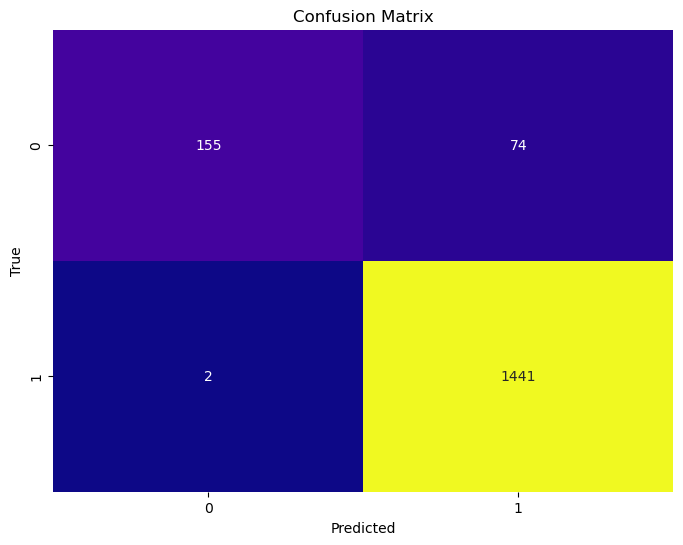

In [36]:
# Data Visualisation - Confusion Matrix

cm = confusion_matrix(Y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()
